## Summary
* Explored the most reviewed cities, most popular business categories and distribution of business's star ratings.
* Explored the number of reviews over years and found a fast growth of review numbers after 2012. That means Yelp's uer base expanded a lot after 2012.
* Built word clouds to represent the top positive reviews and top negative reviews
* Combined review and business dataset for further NLP and modeling 

In [1]:
import pandas as pd
review=pd.read_csv('yelp_review.csv')

In [2]:
business=pd.read_csv('yelp_business.csv')

In [3]:
review.shape

(5261668, 9)

In [4]:
review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [5]:
business.shape

(174567, 13)

In [6]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [7]:
business.business_id.nunique()

174567

In [8]:
review.business_id.nunique()

174567

## Explore the Business Dataset
#### what are the top reviewed cities?

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

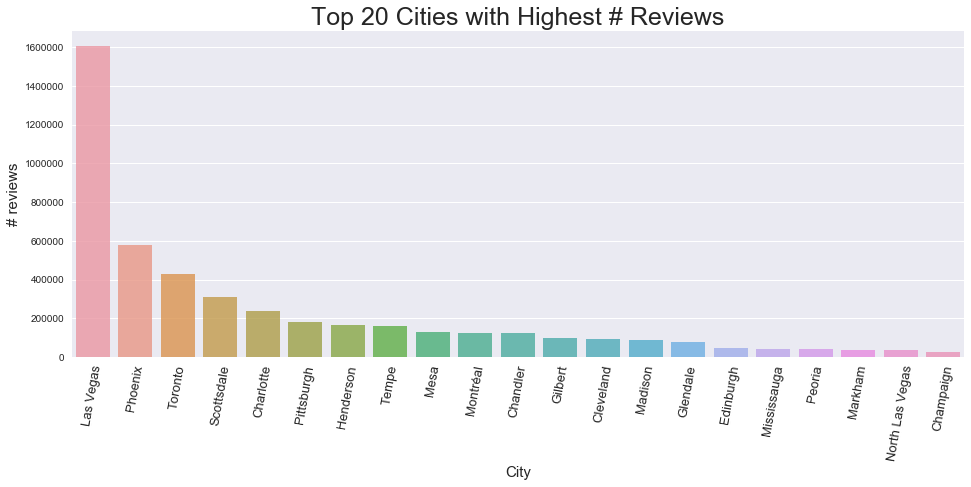

In [13]:
top20city=business.groupby('city').review_count.sum().sort_values(ascending=False).iloc[:21]#.plot(kind='bar',figsize=(8,6))

plt.figure(figsize=(16,6))
ax = sns.barplot(top20city.index, top20city.values, alpha=0.8)
plt.title("Top 20 Cities with Highest # Reviews",fontsize=25)
locs, labels = plt.xticks(fontsize=13)
plt.setp(labels, rotation=80)
plt.ylabel('# reviews', fontsize=15)
plt.xlabel('City', fontsize=15)

#### what are the top business categories?

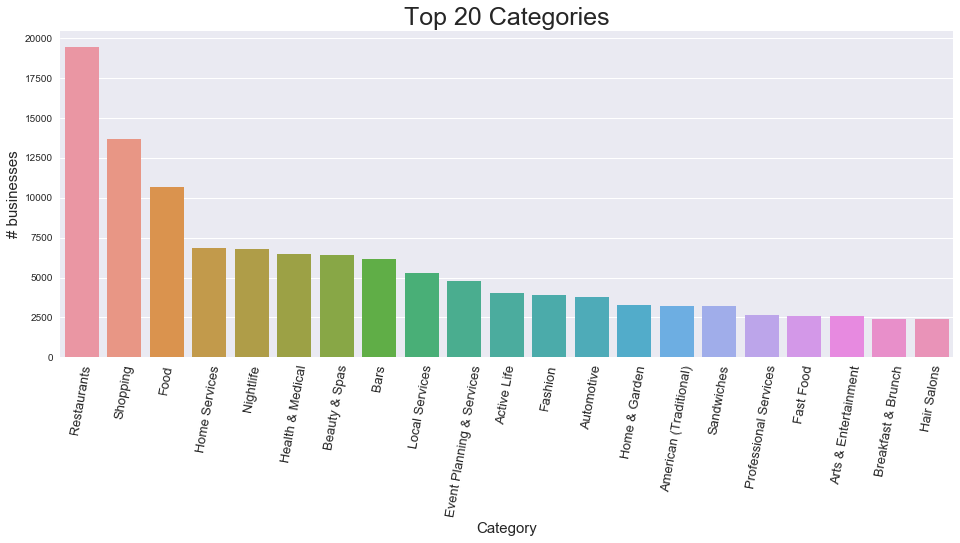

In [19]:
# concatenate categories together
business_cats=' '.join(business['categories'])

cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
top20category=cats.category.value_counts().sort_values(ascending=False).iloc[:21]


#chart
plt.figure(figsize=(16,6))
barplot=sns.barplot(top20category.index,top20category.values)#,color=color[5])
plt.title("Top 20 Categories",fontsize=25)
locs, labels = plt.xticks(fontsize=13)
plt.setp(labels, rotation=80)
#labels = top20category.values
plt.ylabel('# businesses', fontsize=15)
plt.xlabel('Category', fontsize=15)
# rects = ax.patches
# labels = top20category.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')


#### how the star ratings are distributed?

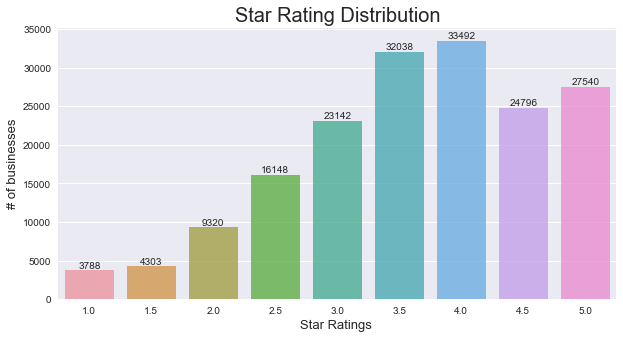

In [20]:
#Get the distribution of the ratings
stars=business['stars'].value_counts().sort_index()

#plot
plt.figure(figsize=(10,5))
ax= sns.barplot(stars.index, stars.values, alpha=0.8)
plt.title("Star Rating Distribution", fontsize=20)
plt.ylabel('# of businesses', fontsize=13)
plt.xlabel('Star Ratings ', fontsize=13)

#adding the text labels
rects = ax.patches
labels = stars.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [22]:
business['stars'].value_counts()/business.shape[0]

4.0    0.191858
3.5    0.183528
5.0    0.157762
4.5    0.142043
3.0    0.132568
2.5    0.092503
2.0    0.053389
1.5    0.024650
1.0    0.021699
Name: stars, dtype: float64

#### From the charts above, Las Vegas is the highest reviewed city. Restaurant category accounts for the most number of business. about 40% of business get 3.5-4 stars

### Explore the Review Dataset

#### How many reviews by year in the review dataset?

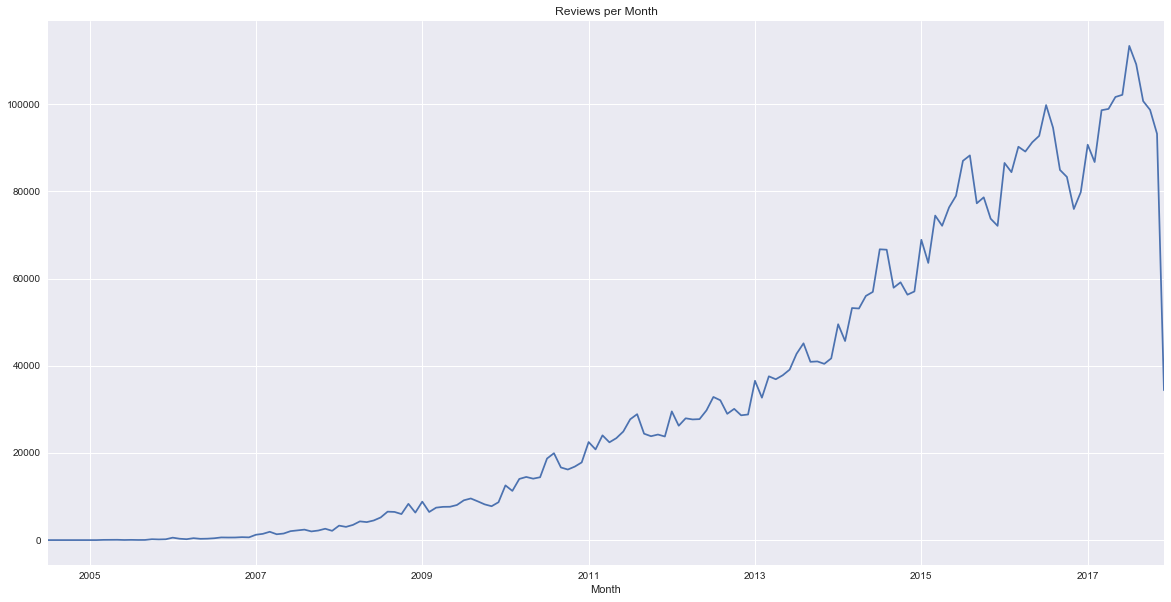

In [23]:
review['Month'] = pd.to_datetime(review['date']).dt.to_period('M')
review.groupby('Month').text.count().plot(kind='line', figsize=(20,10),title='Reviews per Month')

In [24]:
review['Month'].value_counts()

2017-07    113394
2017-08    109166
2017-06    102172
2017-05    101673
2017-09    100731
2017-04     98938
2017-10     98711
2017-03     98636
2016-08     94622
2017-11     93230
2016-05     91274
2017-01     90722
2016-03     90259
2016-04     89153
2015-08     88266
2015-07     87022
2017-02     86751
2016-01     86535
2016-09     84934
2016-02     84425
2016-10     83327
2016-12     79837
2015-06     78992
2015-10     78651
2015-09     77280
2015-05     76338
2016-11     75972
2015-03     74463
2015-11     73747
2015-04     72121
            ...  
2007-04      1339
2007-01      1227
2006-11       675
2006-12       628
2006-08       612
2006-10       598
2006-09       590
2006-01       558
2006-04       441
2006-07       424
2006-06       327
2006-02       314
2006-05       292
2006-03       210
2005-10       202
2005-12       192
2005-11       153
2005-05        69
2005-04        53
2005-07        53
2005-03        51
2005-09        35
2005-08        28
2005-06        26
2004-10   

In [30]:
review[review['date']>='2017-05-01'].shape

(753471, 10)

#### take a subset of the review data for further analysis. original 5M records slow down the process too much

In [31]:
review_2017=review[review['date']>='2017-05-01']

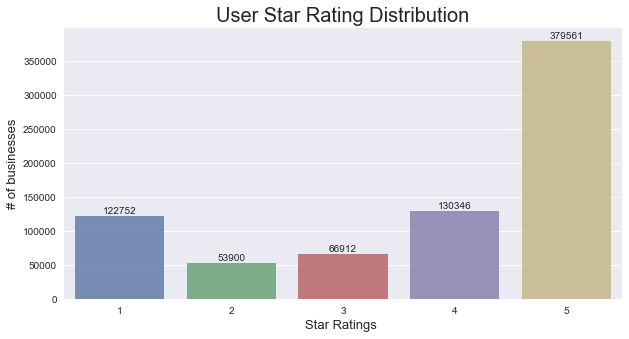

In [41]:
#Get the distribution of the ratings
stars=review_2017['stars'].value_counts().sort_index()

#plot
plt.figure(figsize=(10,5))
ax= sns.barplot(stars.index, stars.values, alpha=0.8)
plt.title("User Star Rating Distribution", fontsize=20)
plt.ylabel('# of businesses', fontsize=13)
plt.xlabel('Star Ratings ', fontsize=13)

#adding the text labels
rects = ax.patches
labels = stars.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

#### create a new column to indicate the review sentiment ( positive or negative )
positive : 4,5 stars  
negative : 3 stars and below

In [34]:
review_2017['pos_neg']=review_2017['stars'].apply(lambda x: 1 if x>=4 else 0)

/Users/xueyiwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


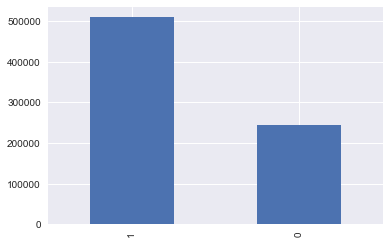

In [37]:
review_2017['pos_neg'].value_counts().plot.bar()

In [32]:
import nltk
import string
from nltk.corpus import stopwords

In [42]:
import re
def remove_stopwords (text):
    i = nltk.corpus.stopwords.words('english')
# punctuations to remove
    j = list(string.punctuation)
# finally let's combine all of these
    stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there','order','restaurant','one','got','place'))
# clean up some special strings, emojis
    text= re.sub('<[^>]*>','',text)
    emoticons= re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    
    text = re.sub('[\W]+',' ',text.lower())+' '.join(emoticons).replace('-','')
    text = [w for w in text.split() if w not in set(stopwords)] 
    return ' '.join(text)
    

In [40]:
review_2017['text_processed']=review_2017['text'].apply(remove_stopwords)

/Users/xueyiwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
review_positive=review_2017.loc[review_2017['pos_neg']==1,'text_processed']
review_negative=review_2017.loc[review_2017['pos_neg']==0,'text_processed']

In [46]:
review_positive.head()

33     great bring dogs really dog bring humans p soo...
51     cute little hole wall two entrances side stree...
86     suzanne able get business five v segments firs...
178    arti fabulous designs spoke flair bright color...
197    stopped recently buy torque wrench staff pleas...
Name: text_processed, dtype: object

### What are the most used words in the positive and negative review?

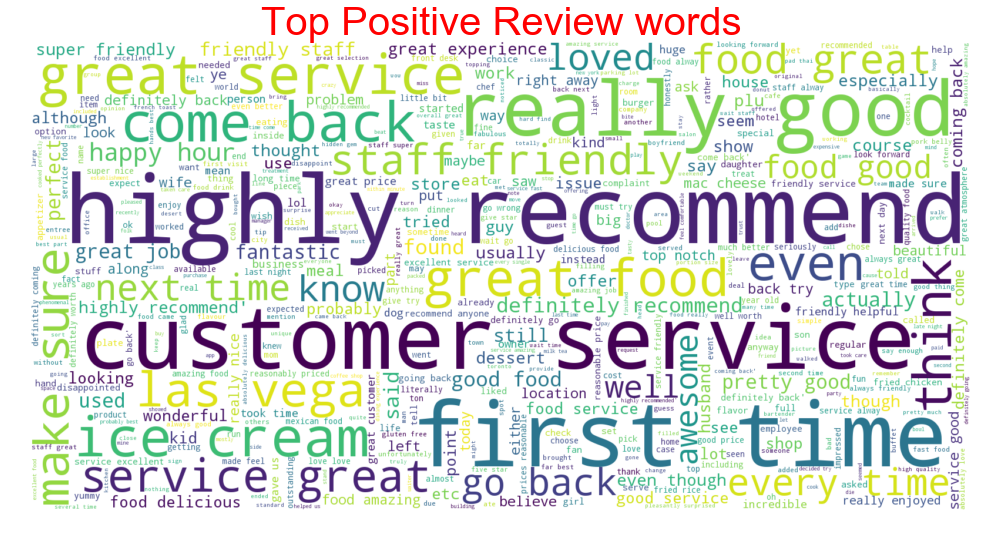

In [47]:
from collections import Counter 
# wordcloud in python
from wordcloud import WordCloud, STOPWORDS 

import string

from textblob import TextBlob
# preprocessing text
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(review_positive)))
# plot 
plt.figure(figsize=(20,10))
plt.title("Top Positive Review words", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)

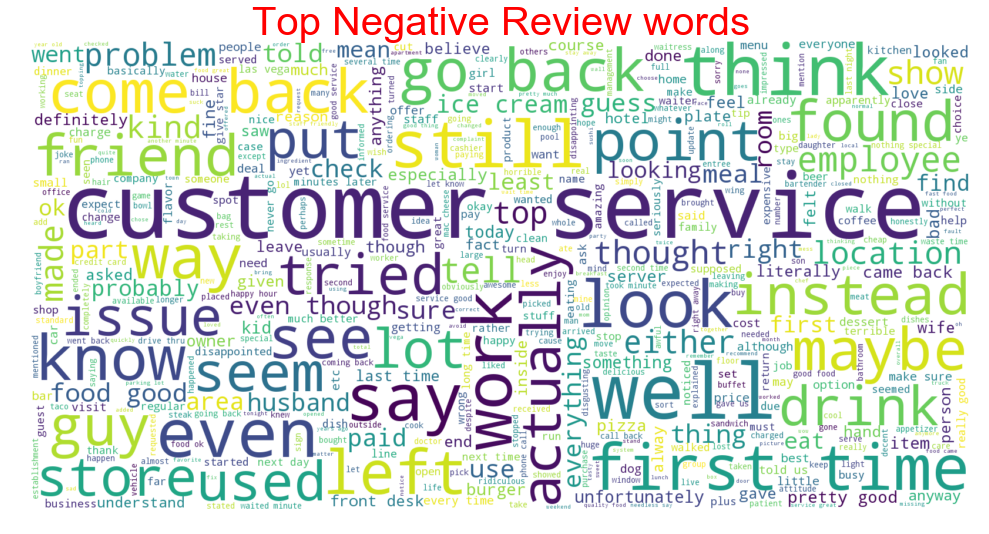

In [48]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(review_negative)))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Negative Review words", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)

#### The word cloud for positive review shows strongly positive words as expected. the negative review word cloud shows mostly neutral words with a few negative words like "problem", "issue". etc. overall, "customer service" is the key word in both positive and negative reviews. It seems to play a pivotal role in people's rating.

#### create a new dataframe for further analysis by merging business and review_2017

In [53]:
new_biz=business[['business_id','name','stars']].copy()

In [60]:
new_biz.head()

,business_id,name,avg_stars
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",4.0
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",3.0
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",1.5
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",3.0
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",3.5


In [57]:
# rename stars to avg_stars to differentiate from user rating stars in review dataset
new_biz=new_biz.rename(columns={'stars':'avg_stars'})

In [61]:
new_biz=new_biz.set_index('business_id')

In [62]:
review_2017=review_2017.set_index('business_id')

In [63]:
review_2017.head()

,review_id,user_id,stars,date,text,useful,funny,cool,Month,pos_neg,text_processed
business_id,,,,,,,,,,,
3E5umUqaU5OZAV3jNLW3kQ,7GsVl-wMaSfG1VoEK6-s6g,u0LXt3Uea_GidxRW1xcsfg,4,2017-11-02,Great place to bring dogs! It's really a dog p...,0,0,0,2017-11,1,great bring dogs really dog bring humans p soo...
l1_S1mfGbEMxfT1f9omhEA,Ebggx4Zlc4VWReJMG1nT6w,u0LXt3Uea_GidxRW1xcsfg,1,2017-10-16,Terrible service and not so great drinks.\n\nW...,0,0,0,2017-10,0,terrible service great drinks happen plaza saw...
I44P6Pfoey2pArOhhx2RnA,jREsaout3cuhKbROVDXUFg,u0LXt3Uea_GidxRW1xcsfg,4,2017-10-17,Cute little hole in the wall place. Two entran...,0,0,0,2017-10,1,cute little hole wall two entrances side stree...
xNNAfZJkLZlAeS-I7-QwgA,S5BSUs-iDrwn6o5968LmEg,u0LXt3Uea_GidxRW1xcsfg,3,2017-10-16,We were here on a holiday Monday where nothing...,0,0,0,2017-10,0,holiday monday nothing much open grab takeout ...
djyIZW8gVNWby8wauISkqg,hkyyWaX-EMiIkvyu1zOBlA,nsOf58RZjMTn8V94EQYJog,5,2017-08-23,Suzanne was able to get my business five T.V. ...,0,0,0,2017-08,1,suzanne able get business five v segments firs...


In [73]:
combined_df=new_biz.join(review_2017[['review_id','user_id','stars','date','text','text_processed','pos_neg']], how='inner')

In [76]:
combined_df.head()

,name,avg_stars,review_id,user_id,stars,date,text,text_processed,pos_neg
business_id,,,,,,,,,
--6MefnULPED_I942VcFNA,"""John's Chinese BBQ Restaurant""",3.0,hTGD7YEb43cFCswkpZ9ORA,FEg8v92qx3kK4Hu4TF28Fg,4,2017-08-17,This is one of my top 3 places to get BBQ pork...,top 3 places get bbq pork char siu cheapest op...,1
--6MefnULPED_I942VcFNA,"""John's Chinese BBQ Restaurant""",3.0,GAaVSO7hu3peq3cFtno1FQ,HPtjvIrhzAUkKsiVkeT4MA,3,2017-05-31,This restaurant is famous for their BBQ dishes...,famous bbq dishes actually good also variety n...,0
--6MefnULPED_I942VcFNA,"""John's Chinese BBQ Restaurant""",3.0,IJGTo-etf2iWnqVjwL0F9g,x-Gbs8sVid3yhJIoHD6Gfw,2,2017-07-30,I walked by the restaurant more than 5 years a...,walked 5 years ago witnessed window employees ...,0
--6MefnULPED_I942VcFNA,"""John's Chinese BBQ Restaurant""",3.0,S4heN4zuYGA0EQGn8iS8Tw,Z4VF-tv5ibkhv_kzVny0NA,1,2017-11-01,Thanks to the grumpy ass old lady for telling ...,thanks grumpy ass old lady telling like pieces...,0
--6MefnULPED_I942VcFNA,"""John's Chinese BBQ Restaurant""",3.0,Qa0DhyR8VzG4ZUy449PrPQ,QbjryxoBD9wfzFpmvgubTw,5,2017-08-26,"After years of going to Lung Tung BBQ, and bei...",years going lung tung bbq disappointed uneven ...,1


In [74]:
import numpy as np
combined_df['review_id'].isnull().sum()

0

In [75]:
combined_df.shape

(753471, 9)

In [77]:
combined_df.to_csv('business_user_review_2017.csv',index_label=False)